In [1]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-Learn Libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_recall_fscore_support

# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Deep Learning Libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
data = pd.read_csv('/content/FaceData.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,Label
0,-2.061987,0.581320,-0.249115,-0.631340,-1.359899,0.751619,-0.029364,1.610456,0.341402,1.286709,...,-0.356844,-0.016488,-0.228473,0.258134,0.046834,0.135742,-0.068297,0.022038,0.090003,1
1,-0.796838,-0.667228,-0.107889,0.019755,-0.686348,0.912779,0.463412,-0.238308,-0.294023,0.215470,...,-0.037243,-0.012105,-0.351285,-0.034968,0.192314,-0.015406,-0.089117,0.023588,-0.019998,1
2,5.376779,1.142695,2.543111,-2.727212,0.272785,-0.972187,1.111221,1.645502,-2.556968,-0.648781,...,0.157441,-0.333875,-0.303720,-0.085975,0.171346,0.128577,-0.118262,0.045881,-0.190158,1
3,7.029235,1.242883,-2.628079,1.224479,-1.141370,-1.620647,0.205890,1.567561,0.736200,0.010782,...,0.051040,-0.068796,0.141841,-0.227999,0.046044,0.013643,-0.125893,0.146396,0.013320,1
4,5.484822,6.752706,-4.291114,1.740412,-1.603087,-1.075175,1.919936,-0.197615,1.030596,1.451936,...,0.034412,0.265141,0.226000,0.032064,-0.113654,0.059126,-0.216803,0.025849,0.020456,1


In [2]:
# Separate Features and Labels
X = data.drop('Label', axis=1)
y = data['Label']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Set Shape:", X_train.shape)
print("Test Set Shape:", X_test.shape)

Training Set Shape: (152, 150)
Test Set Shape: (38, 150)


In [3]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("Random Forest Accuracy:", rf_acc)

# SVM Model
svm_model = SVC(kernel='rbf', probability=True, random_state=42)
svm_model.fit(X_train, y_train)
svm_preds = svm_model.predict(X_test)
svm_acc = accuracy_score(y_test, svm_preds)
print("SVM Accuracy:", svm_acc)

# XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print("XGBoost Accuracy:", xgb_acc)

Random Forest Accuracy: 0.7894736842105263
SVM Accuracy: 0.7894736842105263
XGBoost Accuracy: 0.7631578947368421



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38



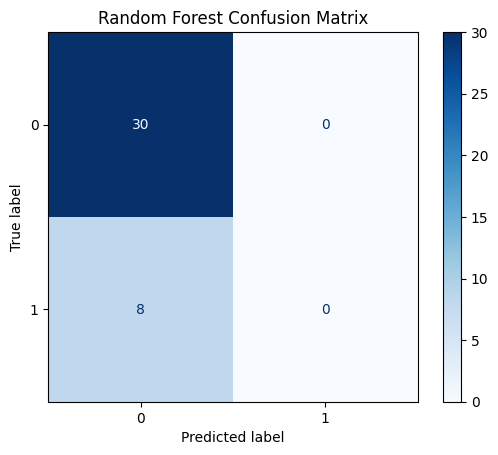


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38



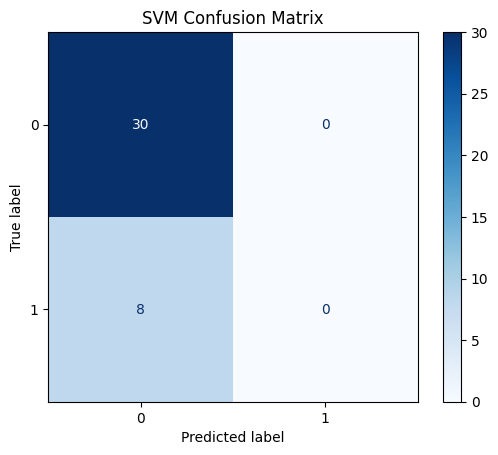


XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        30
           1       0.00      0.00      0.00         8

    accuracy                           0.76        38
   macro avg       0.39      0.48      0.43        38
weighted avg       0.62      0.76      0.68        38



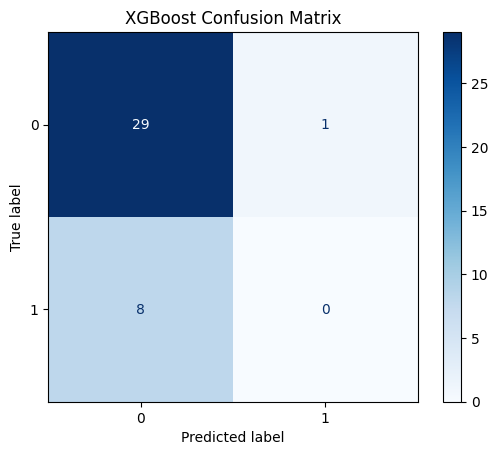

In [4]:
# Function to display evaluation metrics
def evaluate_model(name, y_test, y_pred):
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f"{name} Confusion Matrix")
    plt.show()

# Evaluate Random Forest
evaluate_model('Random Forest', y_test, rf_preds)

# Evaluate SVM
evaluate_model('SVM', y_test, svm_preds)

# Evaluate XGBoost
evaluate_model('XGBoost', y_test, xgb_preds)

In [5]:
# Reshape the data for CNN (Assume square shape for pseudo-image)
# Let's reshape into (10, 15, 1) as 10x15 grid (you can adjust if needed)
X_train_cnn = X_train.reshape(-1, 10, 15, 1)
X_test_cnn = X_test.reshape(-1, 10, 15, 1)

# Convert labels to categorical
y_train_cnn = to_categorical(y_train)
y_test_cnn = to_categorical(y_test)

# CNN Model
cnn_model = Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(10, 15, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(y_train_cnn.shape[1], activation='softmax')
])

# Compile the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=3)

# Train the CNN
history = cnn_model.fit(X_train_cnn, y_train_cnn, epochs=50, batch_size=16,
                        validation_data=(X_test_cnn, y_test_cnn),
                        callbacks=[early_stop, reduce_lr])

Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 337ms/step - accuracy: 0.6395 - loss: 0.6186 - val_accuracy: 0.7895 - val_loss: 0.5021 - learning_rate: 0.0010
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8046 - loss: 0.5030 - val_accuracy: 0.7895 - val_loss: 0.5008 - learning_rate: 0.0010
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7574 - loss: 0.5432 - val_accuracy: 0.7895 - val_loss: 0.4970 - learning_rate: 0.0010
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7831 - loss: 0.4988 - val_accuracy: 0.7895 - val_loss: 0.5009 - learning_rate: 0.0010
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8445 - loss: 0.4215 - val_accuracy: 0.7895 - val_loss: 0.5058 - learning_rate: 0.0010
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7856 - loss: 0.4770 - val_accuracy: 0.7895 - val_loss: 0.5222 - learning_rate: 0.0010
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7888 - loss: 0.4826 - val_accu

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.8076 - loss: 0.4747 

CNN Test Accuracy: 0.7895
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 669ms/step

CNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38



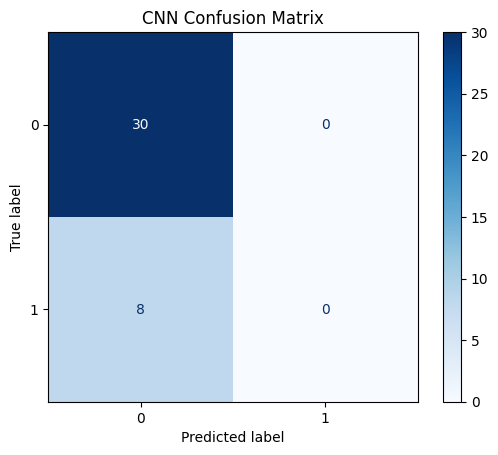

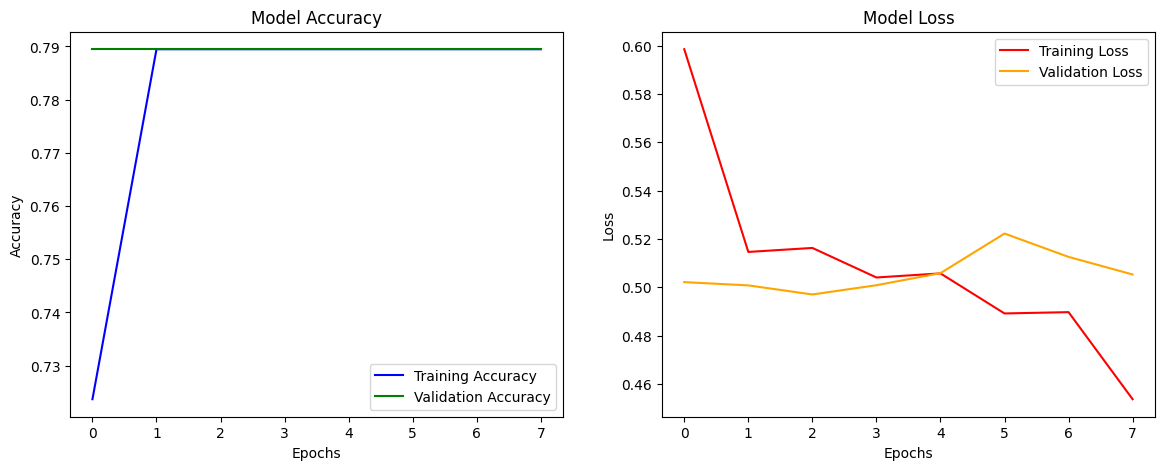

In [6]:
# Evaluate on Test Set
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test_cnn, y_test_cnn)
print(f"\nCNN Test Accuracy: {cnn_test_acc:.4f}")

# Predictions
cnn_preds = np.argmax(cnn_model.predict(X_test_cnn), axis=1)
y_test_labels = np.argmax(y_test_cnn, axis=1)

# Classification Report and Confusion Matrix
evaluate_model('CNN', y_test_labels, cnn_preds)

# Plot Accuracy and Loss Curves
plt.figure(figsize=(14, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='green')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='red')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


Model Comparison:
           Model  Accuracy
3            CNN  0.789474
0  Random Forest  0.789474
1            SVM  0.789474
2        XGBoost  0.763158


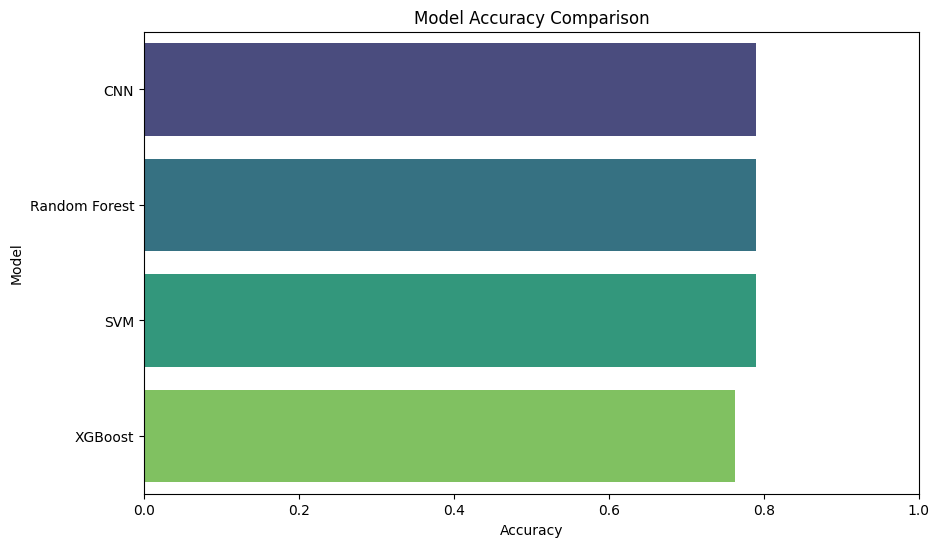

In [7]:
# Model Accuracies
model_names = ['Random Forest', 'SVM', 'XGBoost', 'CNN']
accuracies = [rf_acc, svm_acc, xgb_acc, cnn_test_acc]

# Create Comparison Table
comparison_df = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies
}).sort_values(by='Accuracy', ascending=False)

print("\nModel Comparison:")
print(comparison_df)

# Plot Model Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=comparison_df, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()

In [8]:
from sklearn.model_selection import StratifiedKFold

# Create Cross Validator
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [9]:
# Random Forest Hyperparameter Grid
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
rf_grid.fit(X_train, y_train)

print("\nBest Random Forest Parameters:", rf_grid.best_params_)
print("Best Random Forest Accuracy:", rf_grid.best_score_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits

Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest Accuracy: 0.7896774193548387


In [10]:
# SVM Hyperparameter Grid
svm_params = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly']
}

svm_grid = GridSearchCV(SVC(probability=True, random_state=42), svm_params, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
svm_grid.fit(X_train, y_train)

print("\nBest SVM Parameters:", svm_grid.best_params_)
print("Best SVM Accuracy:", svm_grid.best_score_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits

Best SVM Parameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}
Best SVM Accuracy: 0.7896774193548387


In [11]:
# XGBoost Hyperparameter Grid
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

xgb_grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
                        xgb_params, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
xgb_grid.fit(X_train, y_train)

print("\nBest XGBoost Parameters:", xgb_grid.best_params_)
print("Best XGBoost Accuracy:", xgb_grid.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits

Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Best XGBoost Accuracy: 0.783010752688172



Test Accuracy of Best Random Forest: 0.7895

Best Random Forest (Tuned) Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       0.00      0.00      0.00         8

    accuracy                           0.79        38
   macro avg       0.39      0.50      0.44        38
weighted avg       0.62      0.79      0.70        38



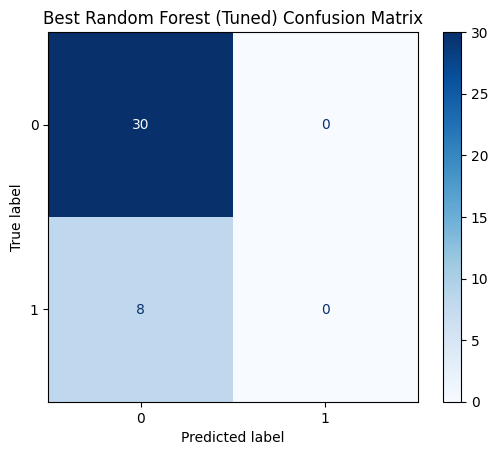

In [12]:
# Best Model from GridSearch (Example: Random Forest)
best_rf = rf_grid.best_estimator_

# Predict on Test Set
best_rf_preds = best_rf.predict(X_test)

# Accuracy on Test Set
best_rf_test_acc = accuracy_score(y_test, best_rf_preds)
print(f"\nTest Accuracy of Best Random Forest: {best_rf_test_acc:.4f}")

# Detailed Evaluation
evaluate_model('Best Random Forest (Tuned)', y_test, best_rf_preds)


In [13]:
best_svm = svm_grid.best_estimator_
best_xgb = xgb_grid.best_estimator_


Final Model Comparison:
                   Model  Accuracy
3                    CNN  0.789474
0  Random Forest (Tuned)  0.789474
1            SVM (Tuned)  0.789474
2        XGBoost (Tuned)  0.789474


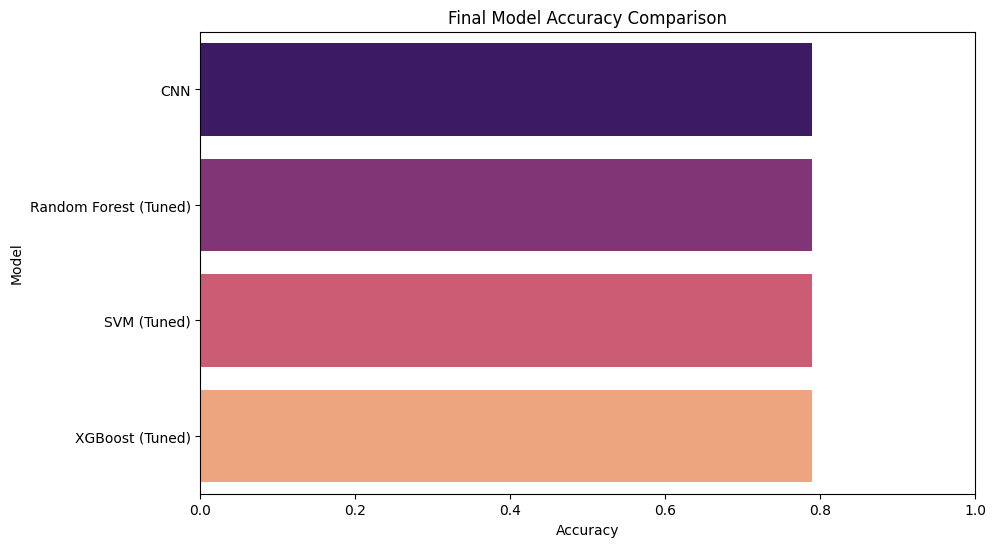

In [14]:
final_model_names = ['Random Forest (Tuned)', 'SVM (Tuned)', 'XGBoost (Tuned)', 'CNN']
final_accuracies = [best_rf_test_acc, accuracy_score(y_test, best_svm.predict(X_test)),
                    accuracy_score(y_test, best_xgb.predict(X_test)), cnn_test_acc]

final_comparison_df = pd.DataFrame({
    'Model': final_model_names,
    'Accuracy': final_accuracies
}).sort_values(by='Accuracy', ascending=False)

print("\nFinal Model Comparison:")
print(final_comparison_df)

# Plot Final Model Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=final_comparison_df, palette='magma')
plt.title('Final Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0, 1)
plt.show()